In [1]:
import os
os.environ['TRANSFORMERS_OFFLINE'] = '1'
from models import *

In [2]:
tokenizer, model = load_model('./ckpts/DecoderOnlyTransformer', load_mode='trainer')
config = model.config

model.apply_attention_map()

Model Parameters: 160,318,268
CONFIG:SimpleDecoderOnlyTransformerConfig {
  "_attn_implementation_autoset": true,
  "_name_or_path": "./ckpts/DecoderOnlyTransformer",
  "architectures": [
    "DecoderOnlyTransformer"
  ],
  "device": "cuda",
  "dropout": 0.1,
  "eps": 1e-06,
  "flash_attn": true,
  "hidden_size": 768,
  "intermediate_size": 3072,
  "max_seq_len": 64,
  "model_type": "simple_decoder_only_transformer",
  "n_layers": 12,
  "num_attention_heads": 12,
  "torch_dtype": "float32",
  "transformers_version": "4.48.1",
  "vocab_size": 30524
}

Attention_map is now supported! This may cause unnecessary memory consumption if you are not conducting a visualization.


In [3]:
context = "the company"
input_idx = tokenizer(context, return_tensors='pt')['input_ids'][:, 1:-1].repeat(5, 1).to(config.device)
# input_idx = tokenizer(context, return_tensors='pt')['input_ids'].repeat(5, 1).to(config.device)
generated_idx = model.generate(input_idx, max_new_tokens=100, temperature=0.0001)
generated_text = [''.join(tokenizer.decode(x)) for x in generated_idx.tolist()]
generated_text

["the company. india ' of substitute appearancess, earning press plaudits monday for a scheme by us barracks in a report said sunday. france - billion - ribbon panel of us barracks in france ' s bombing of us barracks in saudi arabia appeared at a us barracks in saudi arabia appeared at the protesters said. france ' s bombing of us barracks in saudi arabia appeared at a us barracks in saudi arabia appeared at a us barracks in saudi arabia appeared at the tension. a report said sunday. diana, a report",
 "the company. india ' of substitute appearancess, earning press plaudits monday for a scheme by us barracks in a report said sunday. france - billion - ribbon panel of us barracks in france ' s bombing of us barracks in saudi arabia appeared at a us barracks in saudi arabia appeared at the protesters said. france ' s bombing of us barracks in saudi arabia appeared at a us barracks in saudi arabia appeared at a us barracks in saudi arabia appeared at the tension. a report said sunday. di

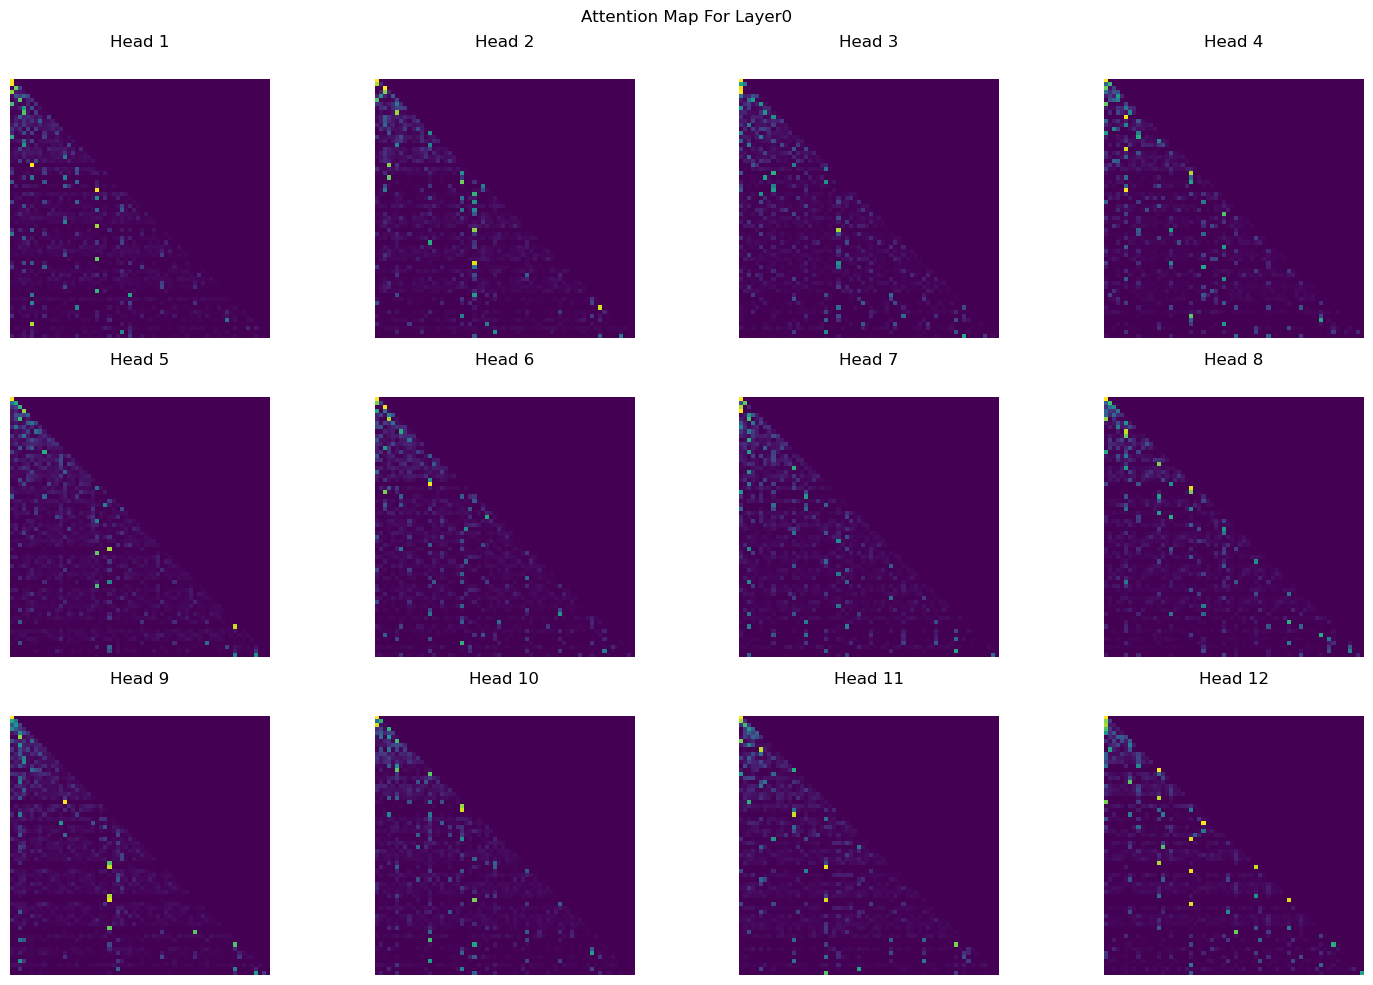

In [4]:
plot_attention(model, layer=0, batch_idx=0)